In [1]:
import numpy as np
from PIL import Image

In [2]:
#conda install -c anaconda pillow
from scipy.optimize import curve_fit  #Takes the data and a given function with unknown vairables as inout and return the variables by fitting the data with the function
import matplotlib.pyplot as plt

In [3]:
im = Image.open('pic.tif')
h,w = np.shape(im) #convert image to an array
# make a 3 dimentional array containing pixel values at (x,y) and frame index
tiffarray = np.zeros((h,w,im.n_frames))
for i in range(im.n_frames):
   im.seek(i)
   tiffarray[:,:,i] = np.array(im)
expim = tiffarray.astype(np.double);
imcut = expim[0:300,0:300,:]

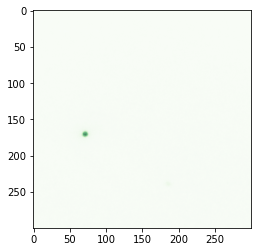

In [4]:
x, y = np.meshgrid(np.linspace(0,300,300),np.linspace(0,300,300))
plt.imshow(imcut[:,:,52], cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear')

In [7]:
def func(x,a,b,x0):
    return a*np.exp(-b*(x-x0)**2)

In [8]:
x00 = []
x= np.linspace(0,300,300)

for n in range (50):
    index = np.where(imcut[:,:,n] == np.max(imcut[:,:,n]))
    x000 = []
    for i in range (index[0][0]-5,index[0][0]+5):
        #index2 = np.where(imcut[:,i,n] == np.max(imcut[:,i,n]))
        z = imcut[i,:,n]
        z = z/np.max(z)
        popt, _ = curve_fit(func, x,z)
        x000.append(popt[2])
    x00.append(np.mean(np.array(x000)))

/tmp/ipykernel_1285/3844050488.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*(x-x0)**2)


In [11]:
y0 = []
x= np.linspace(0,40,40)
for n in range (50):
    index = np.where(imcut[:,:,n] == np.max(imcut[:,:,n]))
    y00 = []
    for i in range (index[1][0]-5,index[1][0]+5):
        index2 = np.where(imcut[:,i,n] == np.max(imcut[:,i,n]))
        z = imcut[index2[0][0]-20:index2[0][0]+20,i,n]
        z = z/np.max(z)
        popt, _ = curve_fit(func, x,z)
        y00.append(popt[2]/2+index2[0][0])
    y0.append(np.mean(np.array(y00)))


/tmp/ipykernel_1285/3844050488.py:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*(x-x0)**2)


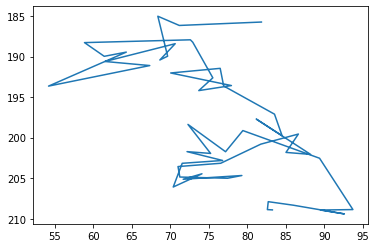

In [17]:
x= np.linspace(0,50,50)
plt.plot(x00,y0)
plt.gca().invert_yaxis()
